In [4]:
import mysql.connector
import pandas as pd

# Establish a connection to the MySQL database
try:
    conn = mysql.connector.connect(
        host="18.136.157.135",
        user="dm_team3",
        password="DM!$!Team!27@9!20&",
        database="project_telecom"
    )

    if conn.is_connected():
        print("Connected to MySQL database")

        # Define your SQL query
        query = "SELECT * FROM telecom_churn_data"  # Replace with your specific query

        # Read the data into a pandas DataFrame
        df = pd.read_sql(query, conn)

        # Display the DataFrame (entire data)
        print(df)

except mysql.connector.Error as err:
    print("Error:", err)


Connected to MySQL database


C:\Users\HP\AppData\Local\Temp\ipykernel_26412\3206101963.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


     columns1 columns2 columns3   columns4 columns5 columns6 columns7  \
0          KS      128      415   382-4657       no      yes       25   
1          OH      107      415   371-7191       no      yes       26   
2          NJ      137      415   358-1921       no       no        0   
3          OH       84      408   375-9999      yes       no        0   
4          OK       75      415   330-6626      yes       no        0   
...       ...      ...      ...        ...      ...      ...      ...   
4612       NY       57      510   345-7512       no      yes       25   
4613       NM      177      408   343-6820       no      yes       29   
4614       VT       67      408   338-4794       no      yes       33   
4615       MI       98      415   355-8388       no      yes       23   
4616       IN      140      415   409-6884       no       no        0   

     columns8 columns9 columns10  ... columns12 columns13 columns14 columns15  \
0       265.1      110     45.07  ...     

In [5]:
df

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


### Renaming the column names

In [8]:
# Define a dictionary for column renaming
new_column_names = {
            'columns1': 'State',
            'columns2': 'Account Length','columns3': 'Area Code',
            'columns4': 'Phone','columns5': 'Int Plan',
            'columns6': 'VMail Plan','columns7': 'VMail Message',
            'columns8': 'Day Mins','columns9': 'Day Calls',
            'columns10': 'Day Charge','columns11': 'Eve Mins',
            'columns12': 'Eve Calls','columns13': 'Eve Charge',
            'columns14': 'Night Mins','columns15': 'Night Calls',
            'columns16': 'Night Charge','columns17': 'Int Mins',
            'columns18': 'Int Calls','columns19': 'Int Charge',
            'columns20': 'CustServ Call','columns21': 'Churn'}
    
# Rename columns
df = df.rename(columns=new_column_names)

# Display the DataFrame with renamed columns
print(df)

     State Account Length Area Code      Phone Int Plan VMail Plan  \
0       KS            128       415   382-4657       no        yes   
1       OH            107       415   371-7191       no        yes   
2       NJ            137       415   358-1921       no         no   
3       OH             84       408   375-9999      yes         no   
4       OK             75       415   330-6626      yes         no   
...    ...            ...       ...        ...      ...        ...   
4612    NY             57       510   345-7512       no        yes   
4613    NM            177       408   343-6820       no        yes   
4614    VT             67       408   338-4794       no        yes   
4615    MI             98       415   355-8388       no        yes   
4616    IN            140       415   409-6884       no         no   

     VMail Message Day Mins Day Calls Day Charge  ... Eve Calls Eve Charge  \
0               25    265.1       110      45.07  ...        99      16.78   
1  

In [9]:
# Define the file path where you want to save the CSV
file_path = 'telecom_churn_data.csv'  # Change the file path and name as needed

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude the index column

print(f"DataFrame saved as CSV: {file_path}")


DataFrame saved as CSV: telecom_churn_data.csv


### Import Libaries

In [11]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
data =  pd.read_csv('telecom_churn_data.csv')

In [13]:
data

,State,Account Length,Area Code,Phone,Int Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Int Mins,Int Calls,Int Charge,CustServ Call,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


###  Domain Analysis

- ***State***:

This column likely represents the state where the telecom service is being used. The domain would consist of state abbreviations (e.g., NY, CA, TX) or full names.

- ***Account Length***: 

This could refer to the length of time the account has been active. The domain would be numerical, representing the number of months or billing cycles.

- ***Area Code***:

This might represent the area code associated with the phone number. Domains would be numerical values corresponding to different geographic regions.

- ***Phone***:

Typically, this column contains phone numbers. The domain would consist of strings or numerical representations of phone numbers.

- ***International Plan***:

This could be a categorical column indicating whether the user has an international calling plan (e.g., Yes/No or True/False).

- ***VMail Plan***:

Similar to the International Plan, this might indicate if the user has a voicemail plan (e.g., Yes/No or True/False).

- ***VMail Message***:

This could represent the number of voicemail messages. The domain would be numerical.

- ***Day Mins, Day Calls, Day Charge***:

These columns likely represent metrics related to daytime usage minutes, number of calls, and associated charges.

- ***Eve Mins, Eve Calls, Eve Charge***:

Similar to the daytime metrics but related to evening usage.

- ***Night Mins, Night Calls, Night Charge***:

These might represent metrics related to nighttime usage.

- ***International Mins, International Calls, International Charge***:

Metrics related to international usage.

- ***CustServ Calls***:

This could represent the number of customer service calls made.

- ***Churn***: 

This column might indicate whether a customer churned (cancelled the service) or not. The domain would likely be categorical (e.g., Yes/No or True/False).

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           4617 non-null   object 
 1   Account Length  4617 non-null   int64  
 2   Area Code       4617 non-null   int64  
 3   Phone           4617 non-null   object 
 4   Int Plan        4617 non-null   object 
 5   VMail Plan      4617 non-null   object 
 6   VMail Message   4617 non-null   int64  
 7   Day Mins        4617 non-null   float64
 8   Day Calls       4617 non-null   int64  
 9   Day Charge      4617 non-null   float64
 10  Eve Mins        4617 non-null   float64
 11  Eve Calls       4617 non-null   int64  
 12  Eve Charge      4617 non-null   float64
 13  Night Mins      4617 non-null   float64
 14  Night Calls     4617 non-null   int64  
 15  Night Charge    4617 non-null   float64
 16  Int Mins        4617 non-null   float64
 17  Int Calls       4617 non-null   i

In [15]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Int Mins,Int Calls,Int Charge,CustServ Call
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [16]:
data.head(5)

,State,Account Length,Area Code,Phone,Int Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Int Mins,Int Calls,Int Charge,CustServ Call,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [17]:
data.tail(5)

,State,Account Length,Area Code,Phone,Int Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Int Mins,Int Calls,Int Charge,CustServ Call,Churn
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.80,...,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [18]:
data.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int Plan          0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Int Mins          0
Int Calls         0
Int Charge        0
CustServ Call     0
Churn             0
dtype: int64

In [21]:
data.duplicated().sum()

0

In [22]:
# splittig columns according to data types
data_cols_all = list(data.columns)
data_cols_flt = list(data.select_dtypes('float').columns)
data_cols_int = list(data.select_dtypes('integer').columns)
data_cols_obj = list(data.select_dtypes('object').columns)

In [23]:
print(data_cols_flt)

['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins', 'Night Charge', 'Int Mins', 'Int Charge']


In [24]:
print(data_cols_int)

['Account Length', 'Area Code', 'VMail Message', 'Day Calls', 'Eve Calls', 'Night Calls', 'Int Calls', 'CustServ Call']


In [25]:
print(data_cols_obj)

['State', 'Phone', 'Int Plan', 'VMail Plan', 'Churn']


In [26]:
# check float type columns
print(data[data_cols_flt].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day Mins      4617 non-null   float64
 1   Day Charge    4617 non-null   float64
 2   Eve Mins      4617 non-null   float64
 3   Eve Charge    4617 non-null   float64
 4   Night Mins    4617 non-null   float64
 5   Night Charge  4617 non-null   float64
 6   Int Mins      4617 non-null   float64
 7   Int Charge    4617 non-null   float64
dtypes: float64(8)
memory usage: 288.7 KB
None


In [27]:
import sweetviz as sv
my_report= sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Bivariate Anaylsis

In [28]:
# Calculate average numerical values for churned and non-churned customers
churned_avg = data[data['Churn'] == 'Yes'].mean()
non_churned_avg = data[data['Churn'] == 'No'].mean()

print("Average values for churned customers:")
print(churned_avg)

        
print("\nAverage values for non-churned customers:")
print(non_churned_avg)

Average values for churned customers:
State             NaN
Account Length    NaN
Area Code         NaN
Phone             NaN
Int Plan          NaN
VMail Plan        NaN
VMail Message     NaN
Day Mins          NaN
Day Calls         NaN
Day Charge        NaN
Eve Mins          NaN
Eve Calls         NaN
Eve Charge        NaN
Night Mins        NaN
Night Calls       NaN
Night Charge      NaN
Int Mins          NaN
Int Calls         NaN
Int Charge        NaN
CustServ Call     NaN
Churn             NaN
dtype: object

Average values for non-churned customers:
State             NaN
Account Length    NaN
Area Code         NaN
Phone             NaN
Int Plan          NaN
VMail Plan        NaN
VMail Message     NaN
Day Mins          NaN
Day Calls         NaN
Day Charge        NaN
Eve Mins          NaN
Eve Calls         NaN
Eve Charge        NaN
Night Mins        NaN
Night Calls       NaN
Night Charge      NaN
Int Mins          NaN
Int Calls         NaN
Int Charge        NaN
CustServ Call     NaN
Chu

Churn vs. International Plan:
Churn      False.   True.
Int Plan                 
 no          3701     470
 yes          260     186

Churn vs. VMail Plan:
Churn        False.   True.
VMail Plan                 
 no            2822     559
 yes           1139      97

Average VMail Messages for Churned and Non-Churned customers:
Churn
 False.    8.385761
 True.     4.614329
Name: VMail Message, dtype: float64


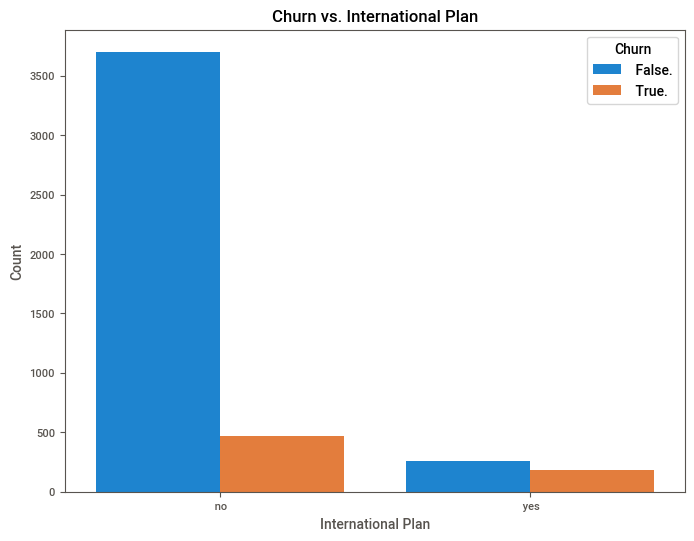

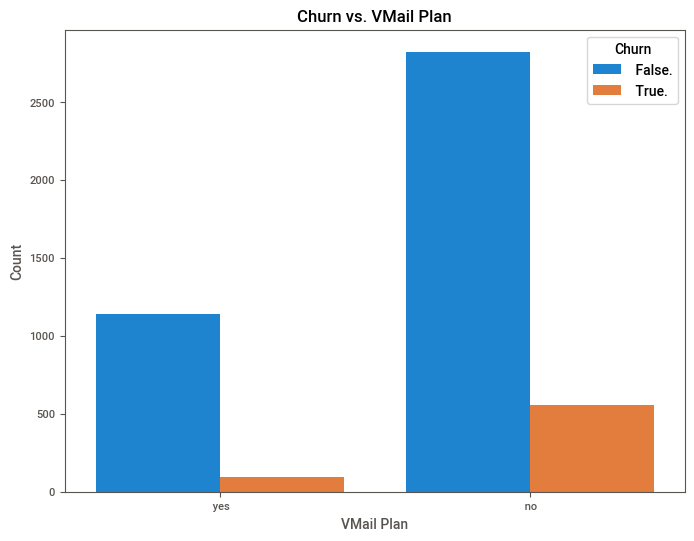

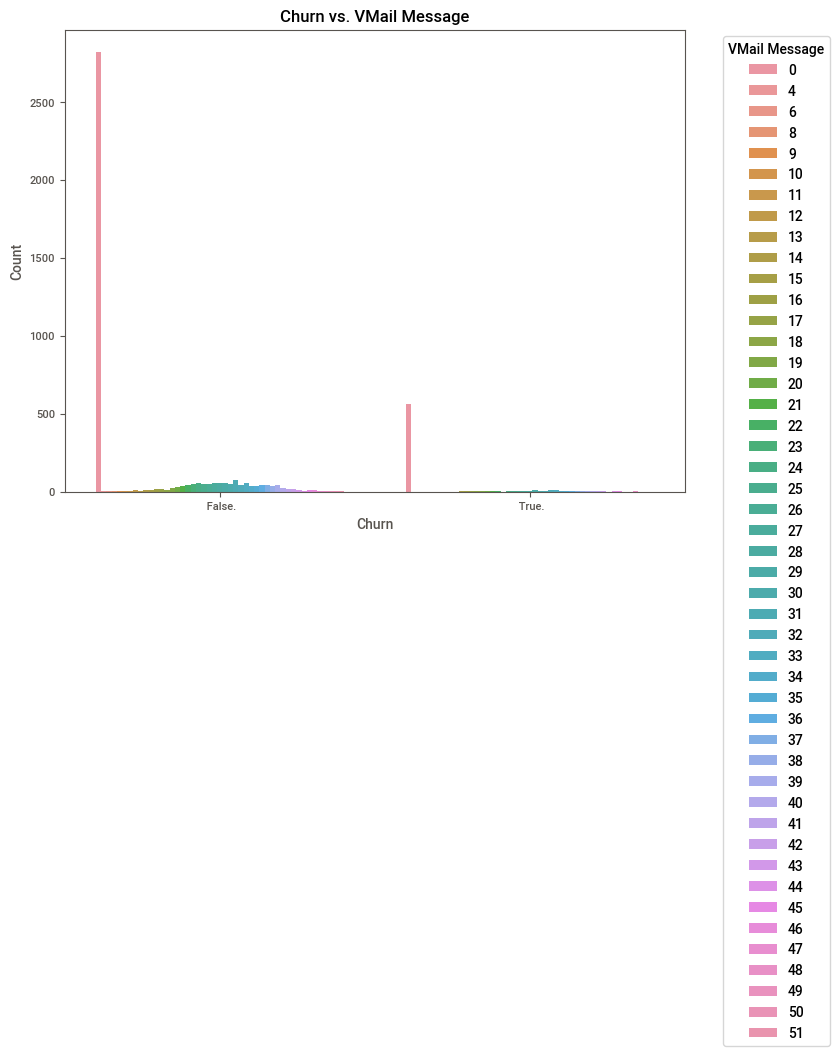

In [31]:
# Assuming df is your DataFrame with the telecom churn data

# Analyzing Churn against International Plan
churn_international = data.groupby(['Int Plan', 'Churn']).size().unstack()
print("Churn vs. International Plan:")
print(churn_international)

# Analyzing Churn against VMail Plan
churn_vmail = data.groupby(['VMail Plan', 'Churn']).size().unstack()
print("\nChurn vs. VMail Plan:")
print(churn_vmail)

# Average VMail Messages for Churned and Non-Churned customers
avg_vmail_messages = data.groupby('Churn')['VMail Message'].mean()
print("\nAverage VMail Messages for Churned and Non-Churned customers:")
print(avg_vmail_messages)

# Countplot for Churn vs. International Plan
plt.figure(figsize=(8, 6))
sns.countplot(x='Int Plan', hue='Churn', data=data)
plt.title('Churn vs. International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

# Countplot for Churn vs. VMail Plan
plt.figure(figsize=(8, 6))
sns.countplot(x='VMail Plan', hue='Churn', data=data)
plt.title('Churn vs. VMail Plan')
plt.xlabel('VMail Plan')
plt.ylabel('Count')
plt.show()

# Countplot for Churn vs. VMail Message
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', hue='VMail Message', data=data)
plt.title('Churn vs. VMail Message')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='VMail Message', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [32]:
 # Separate categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['State', 'Phone', 'Int Plan', 'VMail Plan', 'Churn']

Numerical Columns:
['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Int Mins', 'Int Calls', 'Int Charge', 'CustServ Call']


### Exploratory Data Analysis

#### univariate Analysis

In [20]:
!pip install sweetviz

In [ ]:
plt.figure(figsize=(20,25)) # defining canvas size
plotnum = 1 # counter

for column in num_data: # iteration of columns / acessing the columns from  dataset 
    if plotnum<=70:    # set the limit
        plt.subplot(22,3,plotnum) # # plotting  graphs (5-rows,3-columns) and plotnumber is for count
        sns.boxplot(x = df[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotnum+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction